# Tutorial for P3D emulator

Tutorial showing how to use the v0 emulator (emulate Arinyo parameters)

In [1]:
# %load first_cell.py
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import black
import jupyter_black

jupyter_black.load(
    lab=False,
    line_length=79,
    verbosity="DEBUG",
    target_version=black.TargetVersion.PY310,
)

import numpy as np
import os
import sys
import matplotlib.pyplot as plt

from astropy.cosmology import FlatLambdaCDM

cosmo = FlatLambdaCDM(H0=67.26, Om0=0.314, Ob0=0.049)

from matplotlib import rcParams
rcParams["mathtext.fontset"] = "stix"
rcParams["font.family"] = "STIXGeneral"


def print_shape(*args):
    nelem = len(args)
    for ii in range(nelem - 1):
        print(args[ii].shape, end=" ")
    print(args[nelem - 1].shape)


def ls_level(folder, nlevels):
    for ii in range(nlevels):
        folder = os.path.dirname(folder)
    folder += "/"
    return folder


path_program = ls_level(os.getcwd(), 1)
print(path_program)
sys.path.append(path_program)

DEBUG:jupyter_black:config: {'line_length': 79, 'target_versions': {<TargetVersion.PY310: 10>}}


/home/jchaves/Proyectos/projects/lya/lya_pk/


In [2]:
from lya_pk.archive import GadgetArchive3D
from lya_pk.emulator_p3d import P3DEmulator

## Load training data

In [ ]:
%%time
folder_lya_data = path_program + "data/best_arinyo/"

Archive3D = GadgetArchive3D(
    base_folder=path_program, folder_data=folder_lya_data
)
print(len(Archive3D.training_data))

1650
CPU times: user 11.4 s, sys: 184 ms, total: 11.6 s
Wall time: 11.6 s


## Train or load emulator

#### Train

In [4]:
p3d_emu = P3DEmulator(
    Archive3D.training_data,
    Archive3D.emu_params,
    target_space="Arinyo",
    nepochs=200,
    lr=0.01,
    batch_size=100,
    step_size=75,
    gamma=0.01,
    nhidden=2,
    adamw=True,
)

Emualtor trained in 11.085046529769897 seconds


15.891938209533691


<IPython.core.display.Javascript object>


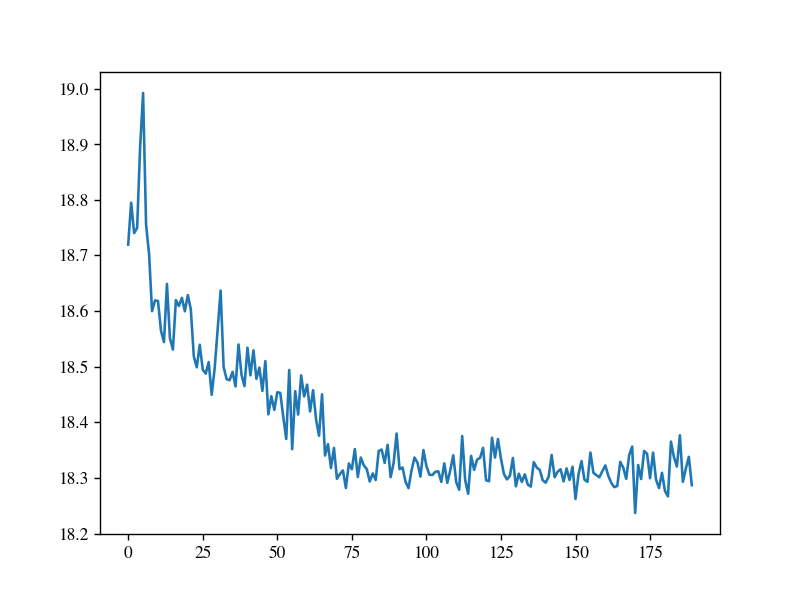

In [5]:
burnin = 10
arr = np.array(p3d_emu.loss_arr)
print(np.min(arr))
plt.plot(np.mean(arr, axis=1)[burnin:])

In [8]:
import torch

In [9]:
file = path_program + "data/emu_v0/p3demu_vo1.pt"
torch.save(p3d_emu.emulator.state_dict(), file)

#### Load

In [9]:
# file = path_program + "data/emu_v0/p3demu_vo1.pt"
# p3d_emu = P3DEmulator(
#     Archive3D.training_data,
#     Archive3D.emu_params,
#     nepochs=200,
#     model_path=file,
#     train=False,
# )

### Precision emulating Arinyo parameters

In [10]:
from lya_pk.plots_v0 import plot_test_parz

<IPython.core.display.Javascript object>


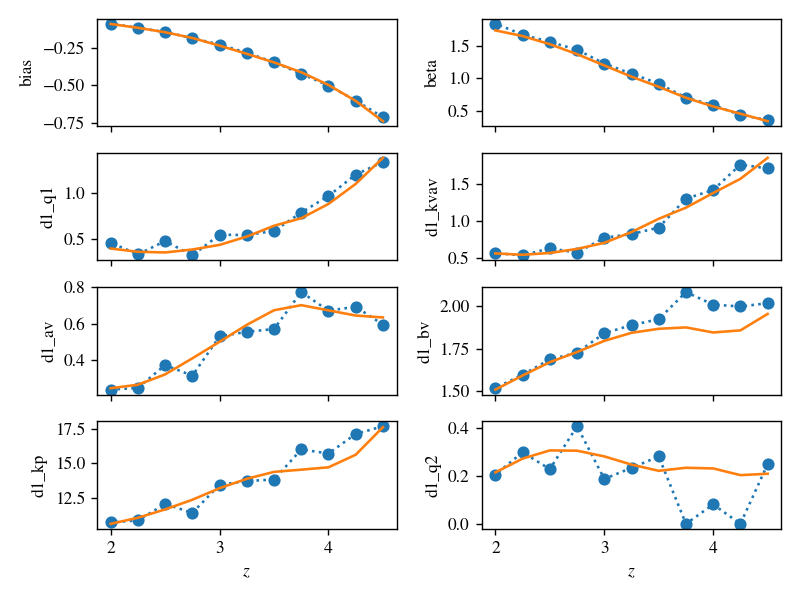

In [11]:
sim_label = "mpg_central"
plot_test_parz(Archive3D, p3d_emu, sim_label)

### Precision emulating P3D

In [12]:
from lya_pk.plots_v0 import plot_test_p3d

<IPython.core.display.Javascript object>


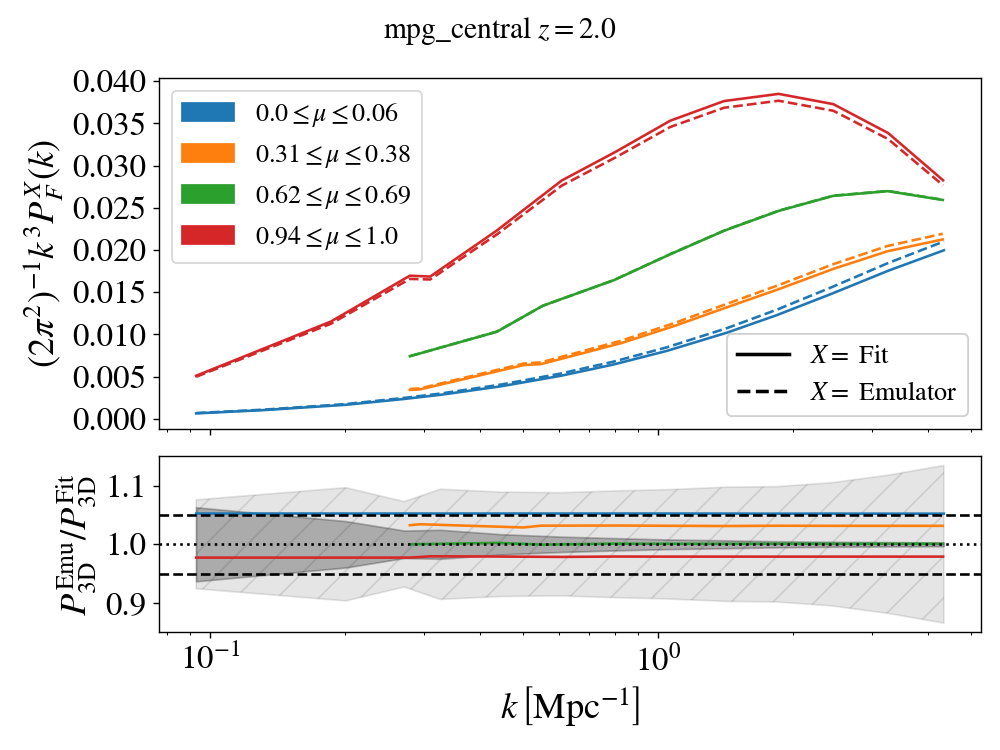

In [23]:
sim_label = "mpg_central"
ind_book = 10
plot_test_p3d(ind_book, Archive3D, p3d_emu, sim_label)

### Extracting linear power spectrum

In [23]:
%%time
for epoch in range(100):
    for ii in range(1650):
        z = Archive3D.training_data[ii]["z"]
        k3d = Archive3D.training_data[ii]["k3d_Mpc"]
        plin = Archive3D.training_data[ii]["model"].linP_Mpc(z, k3d)

CPU times: user 9.28 s, sys: 0 ns, total: 9.28 s
Wall time: 9.3 s


In [ ]:
%%time
for epoch in range(100):
    for ii in range(1650):
        z = Archive3D.training_data[ii]["z"]
        k3d = Archive3D.training_data[ii]["k3d_Mpc"]
        plin = Archive3D.training_data[ii]["model"].linP_Mpc(z, k3d)